In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from pipeline_utils import scrape_json_qs, scrape_all_pages_qs, transform_and_merge_qs, scrape_json_the, transform_the, merge_all, load, transform_cwur, transform_gmaps, extract, sql_engine, load_to_sql, unit_test

## **Scrape JSON QS (Sumber 1)**

In [2]:
url_QS = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/en/3897789.txt?rsn1ph'

In [3]:
df1 = scrape_json_qs(url_QS, 500)

In [4]:
unit_test(df1)

In [5]:
df1.head()

,Id,Rank,University,Score,Country,City,Region
0,1,1,Massachusetts Institute of Technology (MIT),100,United States,Cambridge,North America
1,2,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe
2,3,3,University of Oxford,98.9,United Kingdom,Oxford,Europe
3,4,4,Harvard University,98.3,United States,Cambridge,North America
4,5,5,Stanford University,98.1,United States,Stanford,North America


## **Scrape Web QS (Sumber 2)**

In [3]:
df2 = scrape_all_pages_qs(url_QS, 500)

Getting data from https://www.topuniversities.com/universities/massachusetts-institute-technology-mit (0)
Getting data from https://www.topuniversities.com/universities/university-cambridge (1)
Getting data from https://www.topuniversities.com/universities/university-oxford (2)
Getting data from https://www.topuniversities.com/universities/harvard-university (3)
Getting data from https://www.topuniversities.com/universities/stanford-university (4)
Getting data from https://www.topuniversities.com/universities/imperial-college-london (5)
Getting data from https://www.topuniversities.com/universities/eth-zurich (6)
Getting data from https://www.topuniversities.com/universities/national-university-singapore-nus (7)
Getting data from https://www.topuniversities.com/universities/ucl (8)
Getting data from https://www.topuniversities.com/universities/university-california-berkeley-ucb (9)
Getting data from https://www.topuniversities.com/universities/university-chicago (10)
Getting data from 

In [ ]:
unit_test(df2)

In [5]:
df2.head()

,Id,Ranking,University Name,SAT,TOEFL,,IELTS,ATAR,International Baccalaureate,Own admission test,GPA,GMAT,GRE,Cambridge CAE Advanced,PTE Academic,ACT,Bachelor GPA,A-levels,AP
0,1,#1,Massachusetts Institute of Technology (MIT),1520+,100+,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,#2,University of Cambridge,1460+,100+,,7+,98.5+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,#3,University of Oxford,1470+,100+,,7+,98.5+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,#4,Harvard University,1470+,80+,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,#5,Stanford University,1420+,101+,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Transformasi dan Menggabungkan Sumber 1 dengan Sumber 2**

In [3]:
temp_merged_df_1_2 = transform_and_merge_qs(df1, df2)

d:\DATA\Semester-5\RekayasaData\tugasAkhir\pipeline_utils.py:190: FutureWarning: The default value of regex will change from True to False in a future version.
  temp_merged_df['University'] = temp_merged_df['University'].str.replace(r'\([^)]*\)', '').str.strip()
d:\DATA\Semester-5\RekayasaData\tugasAkhir\pipeline_utils.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_merged_df['TOEFL'].loc[temp_merged_df['TOEFL'] > 200] = np.nan


In [ ]:
unit_test(temp_merged_df_1_2)

In [4]:
temp_merged_df_1_2.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN


## **Staging to save progress source 1 and source 2**

In [3]:
db_engine = sql_engine()

In [ ]:
load_to_sql(temp_merged_df_1_2, 'temp_merged_df_1_2', db_engine)

## **Scrape JSON THE (Sumber 3)**

In [3]:
url_THE = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2024_0__91239a4509dc50911f1949984e3fb8c5.json'

headers_THE = {
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Mobile Safari/537.36'
}

In [4]:
df3 = scrape_json_the(url_THE, headers_THE, 500)

## **Transformasi Sumber 3**

In [6]:
df3 = transform_the(df3)

In [ ]:
unit_test(df3)

In [7]:
df3.head()

,University,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count
0,University of Oxford,21750,0.42,49.0,51.0,32
1,Stanford University,14517,0.23,47.0,53.0,33
2,Massachusetts Institute of Technology,11085,0.33,41.0,59.0,28
3,Harvard University,20050,0.25,51.0,49.0,34
4,University of Cambridge,20565,0.38,48.0,52.0,33


## **Merge Dataframe 1, 2, 3**

In [ ]:
temp_merged_df_1_2_3 = merge_all(temp_merged_df_1_2, df3)

In [ ]:
unit_test(temp_merged_df_1_2_3)

In [ ]:
temp_merged_df_1_2_3.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN,11085.0,0.33,41.0,59.0,28.0
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0,20565.0,0.38,48.0,52.0,33.0
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0,21750.0,0.42,49.0,51.0,32.0
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN,20050.0,0.25,51.0,49.0,34.0
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN,14517.0,0.23,47.0,53.0,33.0


## **Staging to save progress source 1, 2, 3**

In [ ]:
load_to_sql(temp_merged_df_1_2_3, 'temp_merged_df_1_2_3', db_engine)

## **Scrape Web CWUR (Sumber 4)**
#### **Kode scraping ada pada file cwur.py**

In [7]:
# File csv tersebut didapatkan dari hasil scraping yang kami lakukan pada web CWUR. Kode scraping web tersebut dapat dilihat pada file cwur.py
df4 = extract('cwur_data.csv')

## **Transform Sumber 4**

In [8]:
df4 = transform_cwur(df4)

## **Merge Dataframe 1, 2, 3, 4**

In [ ]:
temp_merged_df_1_2_3_4 = merge_all(temp_merged_df_1_2_3, df4)

In [ ]:
unit_test(temp_merged_df_1_2_3_4)

In [ ]:
temp_merged_df_1_2_3_4.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count,Alumni Employability Rank
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN,11085.0,0.33,41.0,59.0,28.0,12
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0,20565.0,0.38,48.0,52.0,33.0,25
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0,21750.0,0.42,49.0,51.0,32.0,27
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN,20050.0,0.25,51.0,49.0,34.0,1
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN,14517.0,0.23,47.0,53.0,33.0,4


## **Staging to save progress source 1, 2, 3, 4**

In [ ]:
load_to_sql(temp_merged_df_1_2_3_4, 'temp_merged_df_1_2_3_4', db_engine)

## **Scrape Rating Google Maps (Sumber 5)**
#### **Kode scraping ada pada folder scrape_gmaps_utils**

In [2]:
# File csv ini kami dapatkan dari hasil scraping rating setiap universitas pada google maps menggunakans selenium
df5 = extract('gmaps_data.csv')

## **Transform Sumber 5**

In [ ]:
df5 = transform_gmaps(df5)

## **Merge All Dataframe**

In [ ]:
merged_all_df = merge_all(temp_merged_df_1_2_3_4, df5)

In [ ]:
unit_test(merged_all_df)

In [ ]:
merged_all_df.head()

,Rank,University,Score,Country,City,Region,TOEFL,IELTS,Total Students,International Students,Male Ratio,Female Ratio,Subjects Count,Alumni Employability Rank,Rating,Total Reviews
0,1,Massachusetts Institute of Technology,100.0,United States,Cambridge,North America,100.0,NaN,11085.0,0.33,41.0,59.0,28.0,12.0,4.7,3790.0
1,2,University of Cambridge,99.2,United Kingdom,Cambridge,Europe,100.0,7.0,20565.0,0.38,48.0,52.0,33.0,25.0,4.6,2876.0
2,3,University of Oxford,98.9,United Kingdom,Oxford,Europe,100.0,7.0,21750.0,0.42,49.0,51.0,32.0,27.0,4.6,6161.0
3,4,Harvard University,98.3,United States,Cambridge,North America,80.0,NaN,20050.0,0.25,51.0,49.0,34.0,1.0,4.5,5731.0
4,5,Stanford University,98.1,United States,Stanford,North America,101.0,NaN,14517.0,0.23,47.0,53.0,33.0,4.0,4.6,3775.0


## **Load Final Data into SQL**

In [4]:
load_to_sql(merged_all_df, 'all_data', db_engine)

500

## **EDA (Daftar Pertanyaan)**
- Region, negara, dan kota apa yang paling banyak memiliki universitas terbaik?
- Apakah ada korelasi antara skor TOEFL dan IELTS terhadap ranking universitas?
- Berapa skor TOEFL dan IELTS mahasiswa yang diterima di universitas top 500?
- Bagaimana distribusi mahasiswa asing berdasarkan peringkat universitasnya?
- Bagaimana distribusi jumlah mahasiswa di universitas top 500?
- Apakah universitas yang peringkatnya lebih tinggi juga memiliki lebih banyak mahasiswa?
- Bagaimana persentase mahasiswa laki-laki dan perempuan pada universitas top 500 di dunia?
- Bagaimana persentase mahasiswa laki-laki dan perempuan berdasarkan region?
- Bagaimana distribusi jumlah program studi berdasarkan peringkat universitasnya?
- Berapa minimal skor akreditasi yang harus didapat oleh universitas agar masuk ke daftar top 500?
- Region apa yang memiliki rata-rata skor akreditasi tertinggi?
- Apa saja universitas di Indonesia yang masuk ke daftar top 500?
- Region apa yang mahasiswanya memiliki skor TOEFL dan IELTS tertinggi?
- Benua apa yang memiliki rata-rata mahasiswa asing terbanyak?
- Bagaimana distribusi peringkat kelayakan kerja alumni pada universitas top 500?
- Bagaimana korelasi antara peringkat kelayakan kerja alumni dengan peringkat universitas?
- Negara apa yang memiliki rata-rata peringkat employability alumni tertinggi?
- Apakah universitas yang memiliki peringkat tinggi juga memiliki rating google maps yang lebih tinggi?
- Bagaimana korelasi antara peringkat universitas dengan jumlah review di google maps?

## **EDA sudah dideploy menggunakan Streamlit pada https://end-to-end-data-pipeline.streamlit.app/**

In [4]:
df = pd.read_sql_query('SELECT * FROM all_data', con = db_engine)

In [5]:
sns.set_palette("viridis")

Region, negara, dan kota apa yang paling banyak memiliki universitas terbaik?

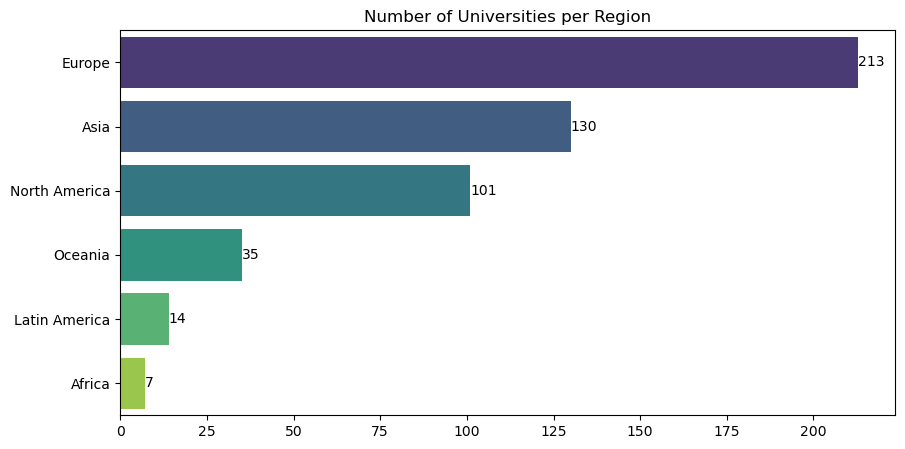

In [6]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.values, y=region_counts.index)

for index, value in enumerate(region_counts.values):
    plt.text(value, index, str(value), va='center')

plt.title('Number of Universities per Region')

plt.show()

Tampak bahwa hampir separuh dari 500 universitas terbaik di dunia berada di Eropa. Hal tersebut masuk akal karena negara-negara di Eropa memberikan anggaran yang besar untuk penelitian dan pengembangan sehingga kualitas pendidikan di sana pun juga sangat baik.

Sementara itu, Afrika hanya memiliki 7 universitas terbaik. Hal ini masuk akal karena Afrika memiliki lebih banyak negara berkembang sehingga kualitas pendidikannya pun juga masih kalah dibanding region lainnya.

Apakah ada korelasi antara skor TOEFL dan IELTS terhadap ranking universitas?

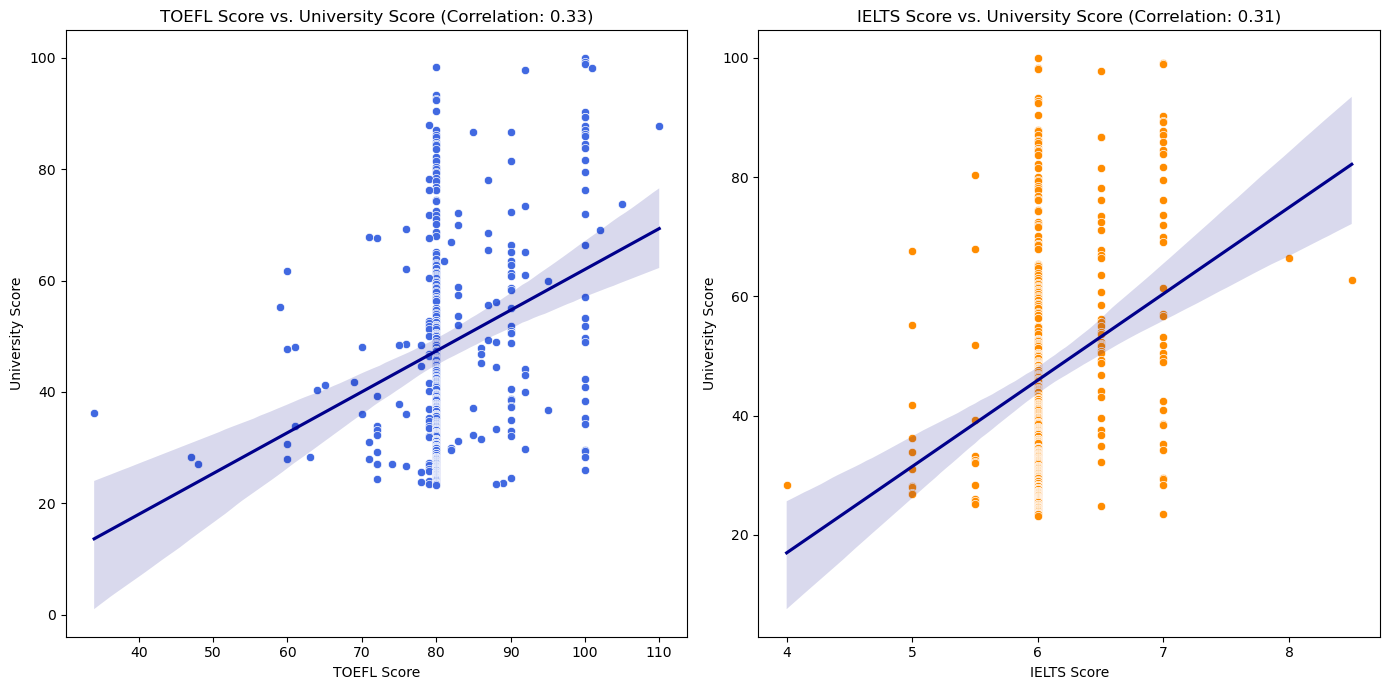

In [42]:
df_correlation = df.copy()

df_correlation['TOEFL'].fillna(df_correlation['TOEFL'].median(), inplace=True)
df_correlation['IELTS'].fillna(df_correlation['IELTS'].median(), inplace=True)

correlation_toefl_uni_score = pearsonr(df_correlation['TOEFL'], df_correlation['Score'])
correlation_ielts_uni_score = pearsonr(df_correlation['IELTS'], df_correlation['Score'])

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

scatter_toefl = sns.scatterplot(data=df_correlation, x='TOEFL', y='Score', ax=axes[0], color='royalblue')
sns.regplot(x='TOEFL', y='Score', data=df, scatter=False, ax=scatter_toefl.axes, color='darkblue')
axes[0].set_title(f'TOEFL Score vs. University Score (Correlation: {correlation_toefl_uni_score[0]:.2f})')
axes[0].set_xlabel('TOEFL Score')
axes[0].set_ylabel('University Score')

scatter_ielts = sns.scatterplot(data=df_correlation, x='IELTS', y='Score', ax=axes[1], color='darkorange')
sns.regplot(x='IELTS', y='Score', data=df, scatter=False, ax=scatter_ielts.axes, color='darkblue')
axes[1].set_title(f'IELTS Score vs. University Score (Correlation: {correlation_ielts_uni_score[0]:.2f})')
axes[1].set_xlabel('IELTS Score')
axes[1].set_ylabel('University Score')

plt.tight_layout()

plt.show()

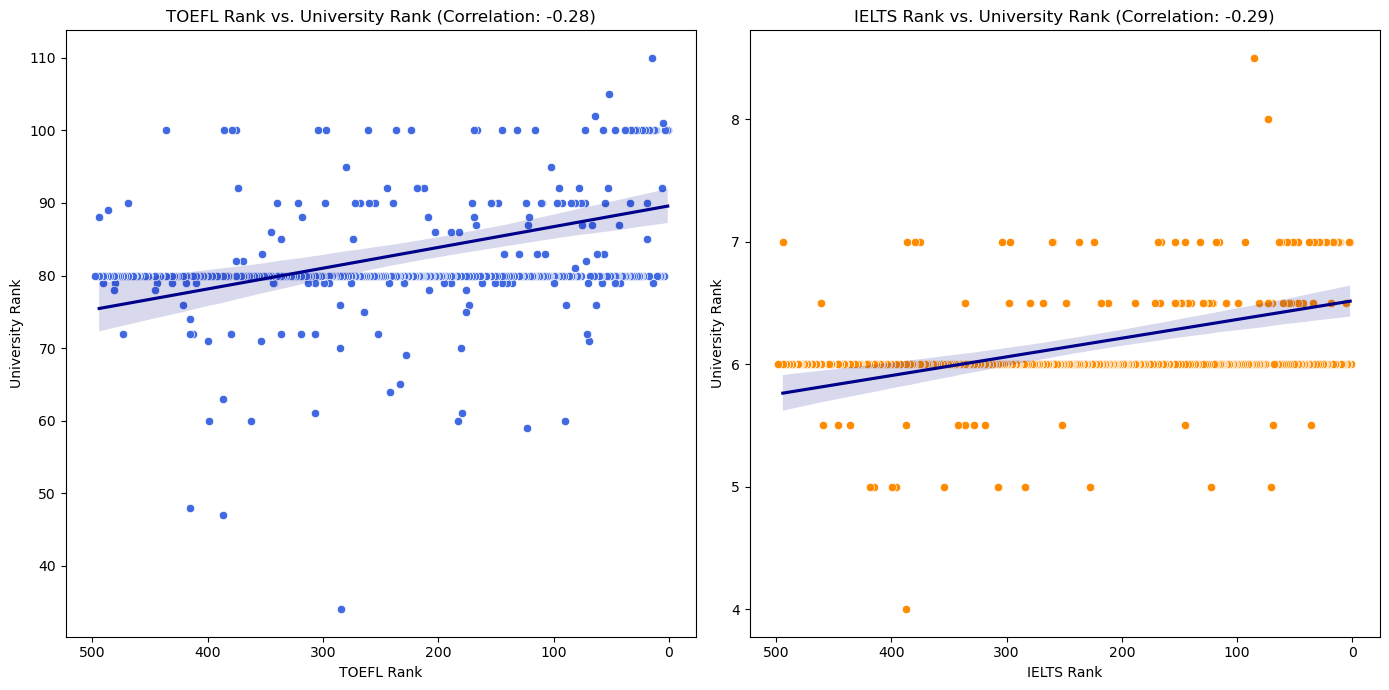

In [8]:
df_correlation = df.copy()

df_correlation['TOEFL'].fillna(df_correlation['TOEFL'].median(), inplace=True)
df_correlation['IELTS'].fillna(df_correlation['IELTS'].median(), inplace=True)

correlation_toefl_uni_Rank = pearsonr(df_correlation['TOEFL'], df_correlation['Rank'])
correlation_ielts_uni_Rank = pearsonr(df_correlation['IELTS'], df_correlation['Rank'])

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

scatter_toefl = sns.scatterplot(data=df_correlation, y='TOEFL', x='Rank', ax=axes[0], color='royalblue')
sns.regplot(y='TOEFL', x='Rank', data=df, scatter=False, ax=scatter_toefl.axes, color='darkblue')
axes[0].set_title(f'TOEFL Rank vs. University Rank (Correlation: {correlation_toefl_uni_Rank[0]:.2f})')
axes[0].set_xlabel('TOEFL Rank')
axes[0].set_ylabel('University Rank')
axes[0].invert_xaxis()

scatter_ielts = sns.scatterplot(data=df_correlation, y='IELTS', x='Rank', ax=axes[1], color='darkorange')
sns.regplot(y='IELTS', x='Rank', data=df, scatter=False, ax=scatter_ielts.axes, color='darkblue')
axes[1].set_title(f'IELTS Rank vs. University Rank (Correlation: {correlation_ielts_uni_Rank[0]:.2f})')
axes[1].set_xlabel('IELTS Rank')
axes[1].set_ylabel('University Rank')
axes[1].invert_xaxis()

plt.tight_layout()

plt.show()

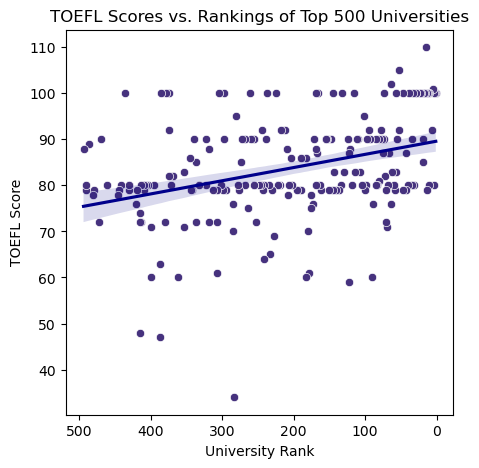

In [44]:
plt.figure(figsize=(5, 5))
scatterplot = sns.scatterplot(x='Rank', y='TOEFL', data=df)

plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='TOEFL', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('TOEFL Scores vs. Rankings of Top 500 Universities')
plt.xlabel('University Rank')
plt.ylabel('TOEFL Score')

plt.show()

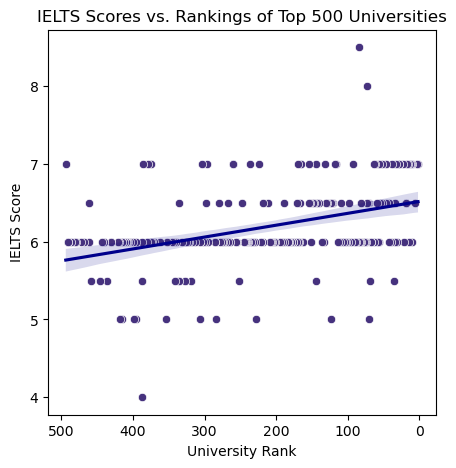

In [45]:
plt.figure(figsize=(5, 5))
scatterplot = sns.scatterplot(x='Rank', y='IELTS', data=df)

plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='IELTS', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('IELTS Scores vs. Rankings of Top 500 Universities')
plt.xlabel('University Rank')
plt.ylabel('IELTS Score')

plt.show()

Ada. Tampak bahwa semakin tinggi peringkat universitas, maka rata-rata skor TOEFL dan IELTS mahasiswanya pun juga semakin tinggi. Hal ini masuk akal karena biasanya universitas yang bagus memiliki syarat lebih ketat daripada universitas lain.

Setidaknya harus memiliki skor TOEFL di atas 80 dan skor IELTS di atas 6.0 supaya bisa menembus top 500 universitas terbaik di dunia.

Bagaimana distribusi mahasiswa asing berdasarkan peringkat universitasnya?

C:\Users\Nando\AppData\Local\Temp\ipykernel_6788\698174909.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='International Students', ci=None, palette='viridis')


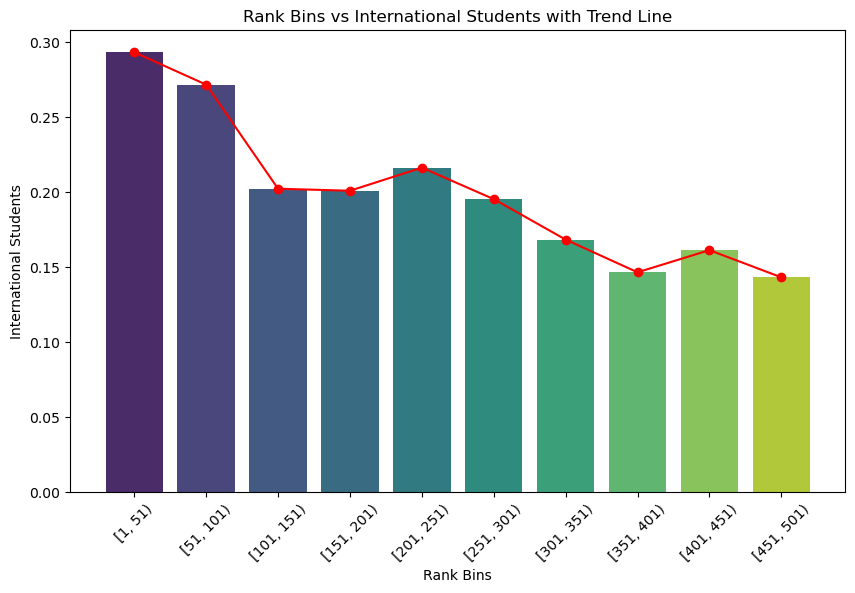

In [15]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['International Students'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='International Students', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['International Students'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs International Students with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('International Students')

plt.show()

Tampak jelas bahwa semakin tinggi peringkat universitas, maka jumlah mahasiswa asingnya juga semakin banyak. Hal ini masuk akal karena universitas yang memiliki peringkat tinggi biasanya lebih terkenal dan memiliki kualitas pendidikan yang baik sehingga banyak mahasiswa asing yang tertarik untuk belajar di sana.

Bagaimana distribusi jumlah mahasiswa di universitas top 500?

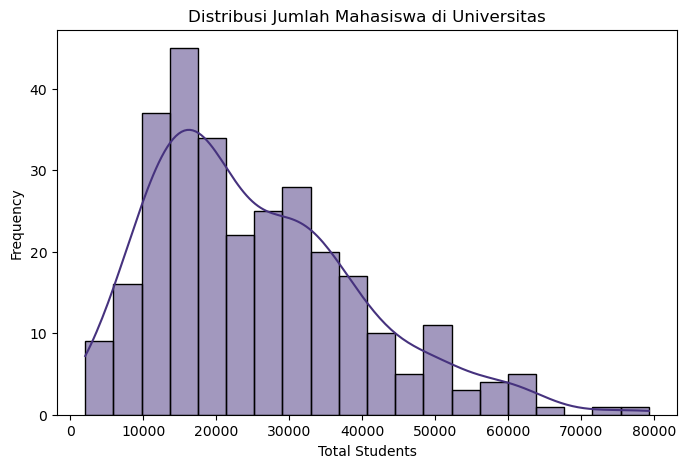

In [96]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Students'], bins=20, kde=True, palette='viridis')
plt.title('Distribusi Jumlah Mahasiswa di Universitas')
plt.xlabel('Total Students')
plt.ylabel('Frequency')
plt.show()

Tampak bahwa distribusi jumlah mahasiswa di universitas top 500 memiliki skewness positif, yang berarti bahwa pusat distribusinya cenderung condong ke kiri. Sebagian besar universitas top 500 memiliki 10000 - 30000 mahasiswa. Sedangkan, mahasiswa terbanyak pada universitas top 500 hampir mencapai 80000 mahasiswa.

Jika kita lihat, tidak ada yang spesial karena angka tersebut memang merupakan skala optimal jumlah mahasiswa di universitas, bukan hanya universitas top 500.

Apakah universitas yang peringkatnya lebih tinggi juga memiliki lebih banyak mahasiswa?

C:\Users\Nando\AppData\Local\Temp\ipykernel_14756\1704909145.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='Total Students', ci=None, palette='viridis')


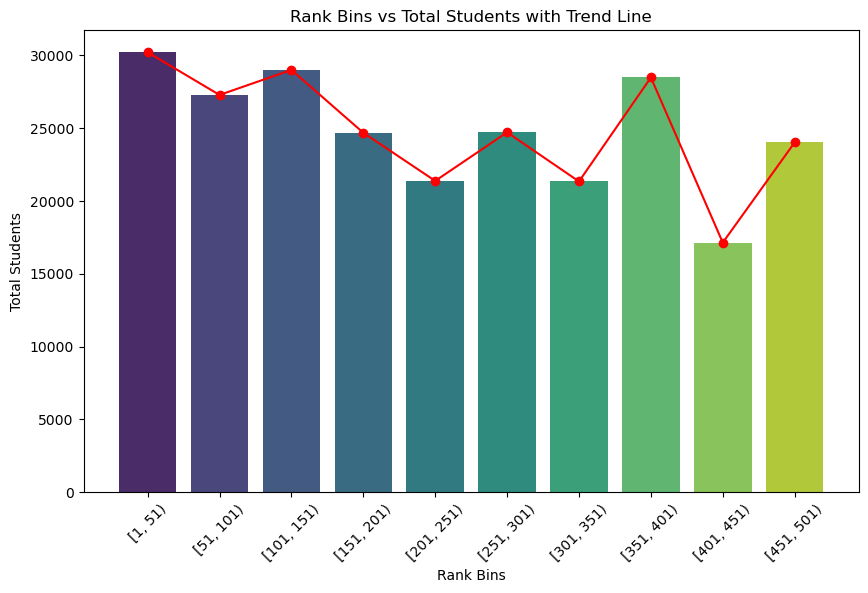

In [ ]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['Total Students'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='Total Students', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['Total Students'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs Total Students with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('Total Students')

plt.show()

Tampak bahwa semakin tinggi peringkat universitas, maka rata-rata jumlah mahasiswanya pun relatif semakin banyak.

Hal tersebut masuk akal karena universitas yang memiliki peringkat tinggi biasanya lebih terkenal sehingga semakin banyak mahasiswa yang tertarik untuk belajar di sana.

Bagaimana persentase mahasiswa laki-laki dan perempuan pada universitas top 500 di dunia?

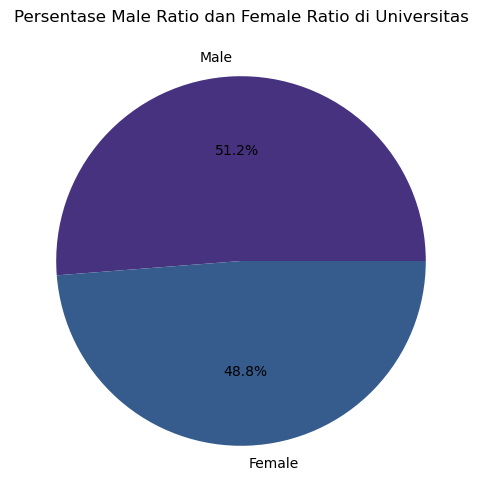

In [109]:
male_percentage = df['Male Ratio'].mean()
female_percentage = df['Female Ratio'].mean()

labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Persentase Male Ratio dan Female Ratio di Universitas')

plt.show()

Tampak bahwa persentase mahasiswa laki-laki dan perempuan di universitas top 500 di dunia tidak jauh berbeda, yaitu sekitar 51% laki-laki dan 49% perempuan.

Bisa jadi pihak universitas menerapkan prinsip kesetaraan gender ketika menerima mahasiswa sehingga persentase laki-laki dan perempuan mirip.

Bagaimana persentase mahasiswa laki-laki dan perempuan berdasarkan region?

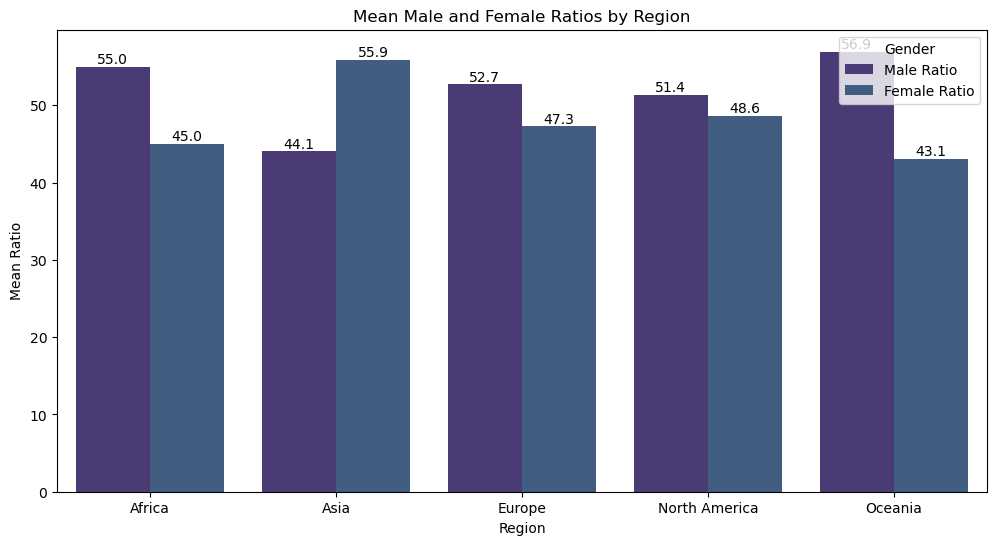

In [132]:
df_copy = df.copy()
df_copy = df.loc[df['Male Ratio'].notnull()]
df_copy = df.loc[df['Female Ratio'].notnull()]

mean_ratios_by_region = df_copy.groupby('Region').agg({
    'Male Ratio': 'mean',
    'Female Ratio': 'mean'
}).reset_index()

mean_ratios_melted = mean_ratios_by_region.melt(id_vars='Region', value_vars=['Male Ratio', 'Female Ratio'], 
                                                var_name='Gender', value_name='Mean Ratio')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_ratios_melted, x='Region', y='Mean Ratio', hue='Gender')

for p in ax.patches:
    value = round(p.get_height(), 1)
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Mean Male and Female Ratios by Region')
plt.xlabel('Region')
plt.ylabel('Mean Ratio')

plt.show()

Tampak jelas bahwa mahasiswa universitas top 500 di Asia didominasi oleh perempuan, sedangkan di benua lain didominasi oleh laki-laki.

Hal tersebut bisa disebabkan karena norma budaya di Asia yang lebih memberikan tekanan sosial bagi perempuan untuk mencapai pendidikan tertentu sebelum menikah.

Bagaimana distribusi jumlah program studi berdasarkan peringkat universitasnya?

C:\Users\Nando\AppData\Local\Temp\ipykernel_6788\2033228876.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='Subjects Count', ci=None, palette='viridis')


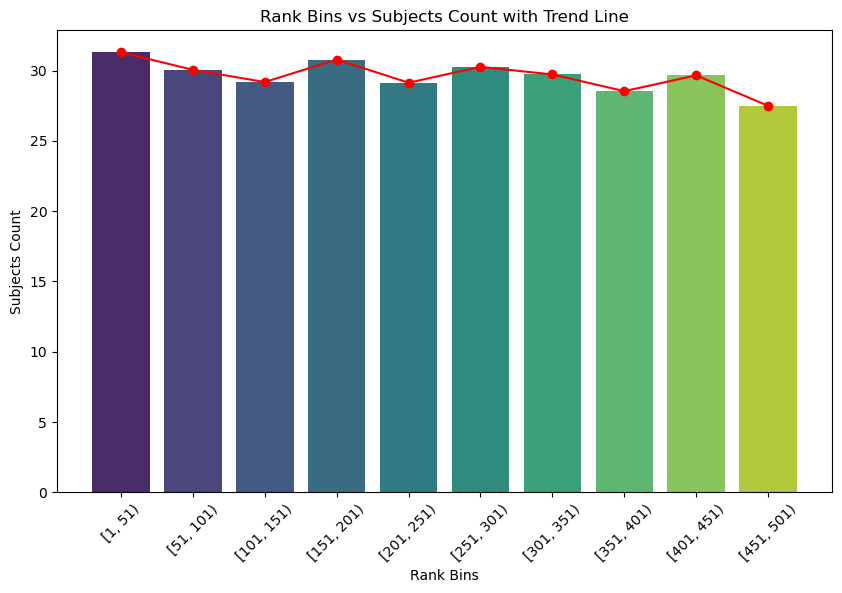

In [16]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['Subjects Count'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='Subjects Count', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['Subjects Count'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs Subjects Count with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('Subjects Count')

plt.show()

Distribusi rata-rata jumlah program studi berdasarkan peringkat universitasnya cukup merata. Namun, universitas top 50 memiliki rata-rata jumlah program studi yang lebih tinggi dibanding peringkat di bawahnya.

Hal tersebut masuk akal karena universitas 50 teratas pasti akan memperluas program studinya agar semakin menarik minat mahasiswa.

Berapa minimal skor akreditasi yang harus didapat oleh universitas agar masuk ke daftar top 500?

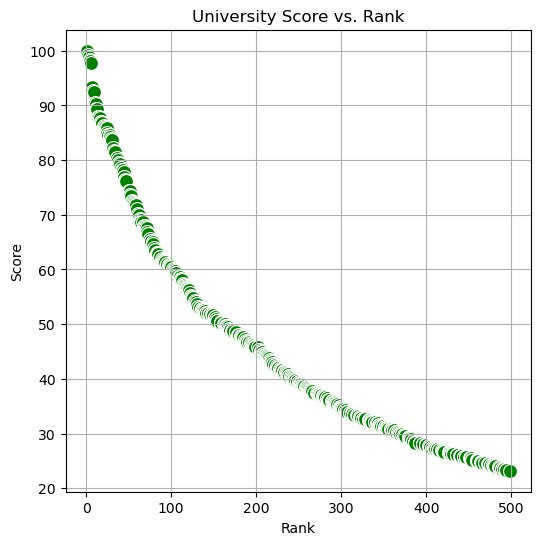

In [60]:
plt.figure(figsize=(6, 6))
scatterplot = sns.scatterplot(x='Rank', y='Score', data=df, s=100, color='green')

plt.title('University Score vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Score')

plt.grid(True)
plt.show()

Skor akreditasi universitas top 100 ada di atas 60, sedangkan skor akreditasi universitas top 500 ada di atas 23. Artinya, setidaknya suatu universitas harus mendapatkan skor akreditasi di atas 60 supaya bisa masuk daftar top 100 universitas terbaik di dunia.

Region apa yang memiliki rata-rata skor akreditasi tertinggi?

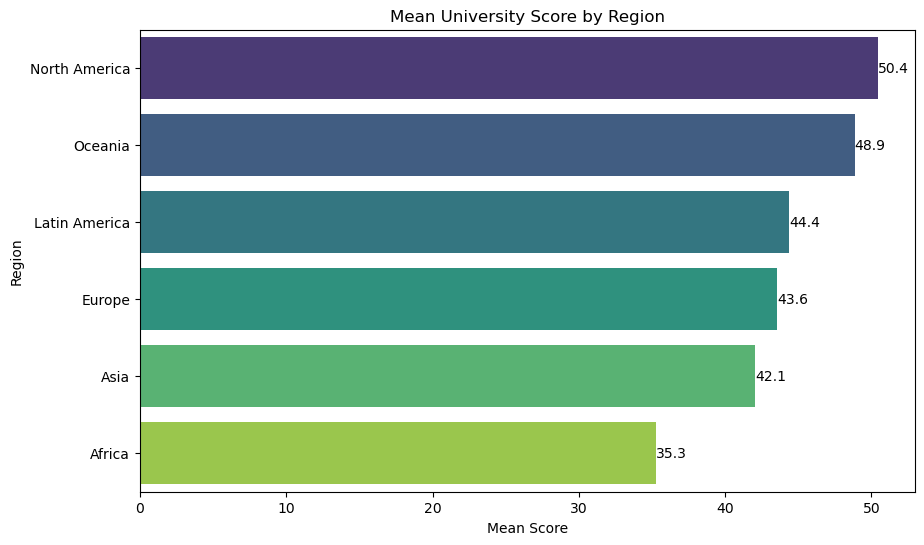

In [6]:
mean_score_by_region = df.groupby('Region')['Score'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Score', y='Region', data=mean_score_by_region)

for index, value in enumerate(mean_score_by_region['Score']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.title('Mean University Score by Region')
plt.xlabel('Mean Score')
plt.ylabel('Region')

plt.show()

Universitas di North America memiliki rata-rata skor akreditasi tertinggi, sedangkan rata-rata skor akreditasi universitas di Africa paling rendah.

Hal ini masuk akal karena pendidikan di Afrika belum sebaik di benua lainnya.

Apa saja universitas di Indonesia yang masuk ke daftar top 500?

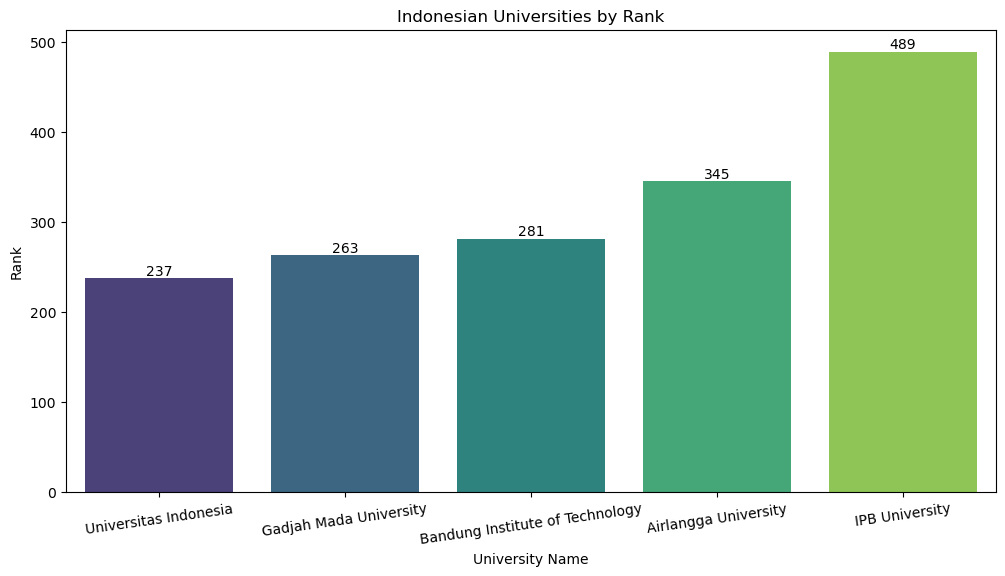

In [135]:
indonesia_universities = df[df['Country'] == 'Indonesia']

indonesia_universities_sorted = indonesia_universities.sort_values('Rank')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=indonesia_universities_sorted, x='University', y='Rank', palette='viridis')

for p in ax.patches:
    value = int(p.get_height())
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Indonesian Universities by Rank')
plt.xticks(rotation=8)
plt.xlabel('University Name')
plt.ylabel('Rank')

plt.show()

Terdapat 5 universitas di Indonesia yang masuk ke daftar top 500, yaitu Universitas Indonesia, Universitas Gadjah Mada, Institut Teknologi Bandung, Universitas Airlangga, dan Institut Pertanian Bogor.

Peringkat tertinggi dipegang oleh Universitas Indonesia, yaitu peringkat 237.

Sayangnya belum ada universitas di Indonesia yang mampu menembus top 100 universitas terbaik di dunia.

Region apa yang mahasiswanya memiliki skor TOEFL dan IELTS tertinggi?

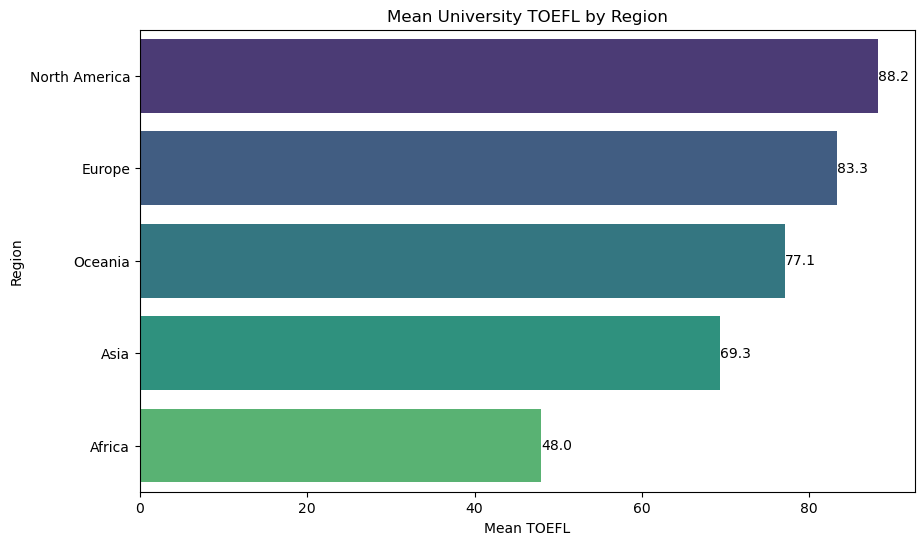

In [113]:
df_copy = df.copy()
df_copy = df.loc[df['TOEFL'].notnull()]
mean_TOEFL_by_region = df_copy.groupby('Region')['TOEFL'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='TOEFL', y='Region', data=mean_TOEFL_by_region)

for index, value in enumerate(mean_TOEFL_by_region['TOEFL']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.title('Mean University TOEFL by Region')
plt.xlabel('Mean TOEFL')
plt.ylabel('Region')

plt.show()

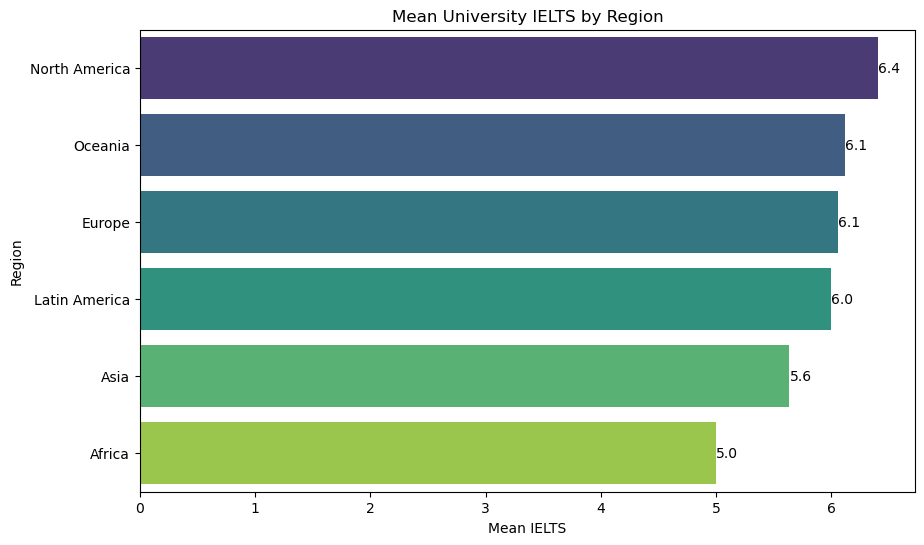

In [84]:
mean_IELTS_by_region = df.groupby('Region')['IELTS'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='IELTS', y='Region', data=mean_IELTS_by_region)

for index, value in enumerate(mean_IELTS_by_region['IELTS']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.title('Mean University IELTS by Region')
plt.xlabel('Mean IELTS')
plt.ylabel('Region')

plt.show()

Mahasiswa di North America memiliki rata-rata skor TOEFL dan IELTS tertinggi, sedangkan mahasiswa di Africa memiliki rata-rata skor TOEFL dan IELTS terendah. Tampak perbedaan yang cukup signifikan antara skor TOEFL di North America dan Africa. Skor TOEFL di North America hampir 2 kali lipat lebih tinggi daripada skor di Africa

Tingginya skor TOEFL dan IELTS di North America sangat wajar karena North America menggunakan bahasa Inggris sebagai bahasa sehari-hari mereka.

FYI: Skor rata-rata TOEFL iBT adalah 84 dan skor rata-rata IELTS adalah 6.0. Artinya mahasiswa di Afrika memiliki skor TOEFL yang masih cukup jauh di bawah rata-rata dunia.

Benua apa yang memiliki rata-rata mahasiswa asing terbanyak?

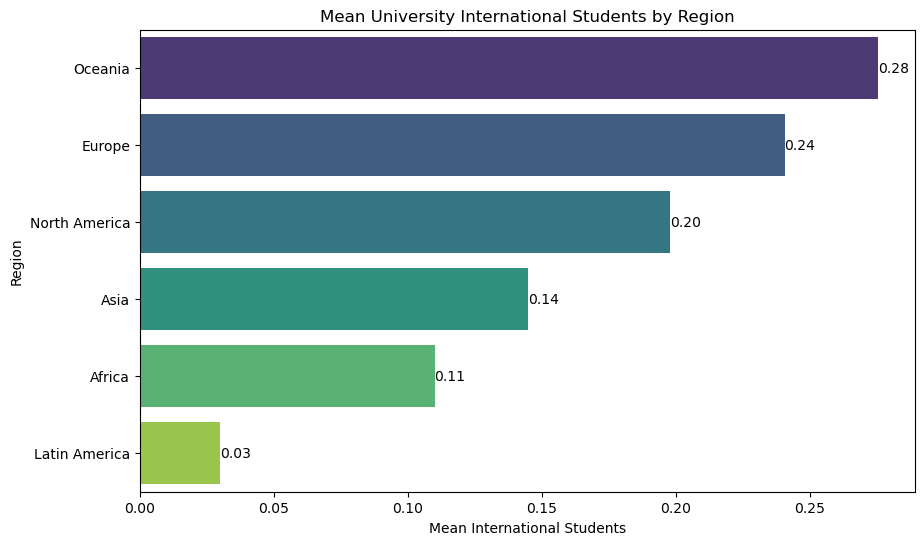

In [94]:
mean_International_Students_by_region = df.groupby('Region')['International Students'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='International Students', y='Region', data=mean_International_Students_by_region)

for index, value in enumerate(mean_International_Students_by_region['International Students']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Mean University International Students by Region')
plt.xlabel('Mean International Students')
plt.ylabel('Region')

plt.show()

Oceania memiliki rata-rata jumlah mahasiswa asing terbanyak, sedangkan Afrika memiliki rata-rata jumlah mahasiswa asing terendah dengan perbedaan yang sangat signifikan dibanding Oceania (2,5 kali lipatnya). Hal ini masuk akal karena Oceania memiliki banyak negara yang terkenal akan kualitas pendidikannya, seperti Australia dan New Zealand. Sementara itu, Afrika memiliki banyak negara yang masih berkembang sehingga mungkin kurang menarik minat mahasiswa asing.

Bagaimana distribusi peringkat kelayakan kerja alumni pada universitas top 500?

C:\Users\Nando\AppData\Local\Temp\ipykernel_32572\2655906948.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Alumni Employability Rank'], bins=30, kde=True, palette='viridis')


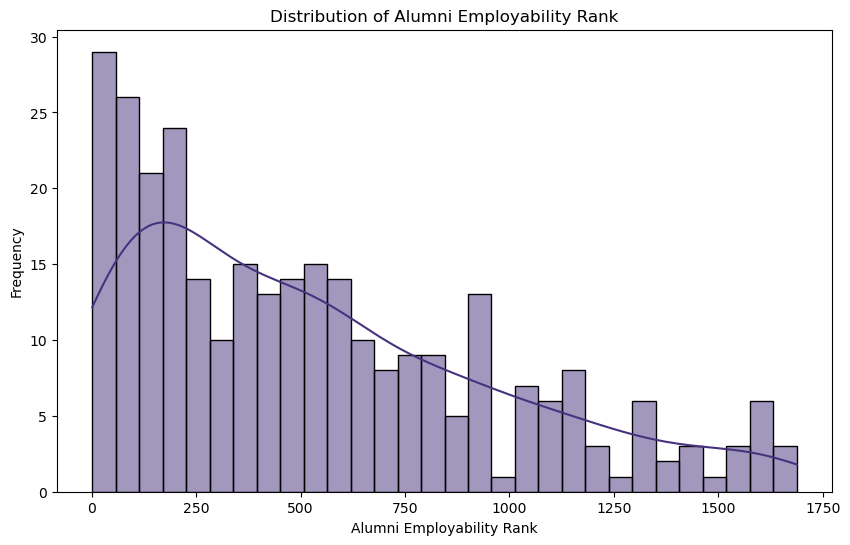

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Alumni Employability Rank'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Alumni Employability Rank')
plt.xlabel('Alumni Employability Rank')
plt.ylabel('Frequency')
plt.show()

Tampak bahwa distribusi peringkat employability alumni pada universitas top 500 memiliki skewness positif, yang berarti bahwa pusat distribusinya cenderung condong ke kiri. Hal ini menunjukkan bahwa lulusan universitas terbaik memiliki kemudahan dalam mencari kerja.

Bagaimana korelasi antara peringkat kelayakan kerja alumni dengan peringkat universitas?

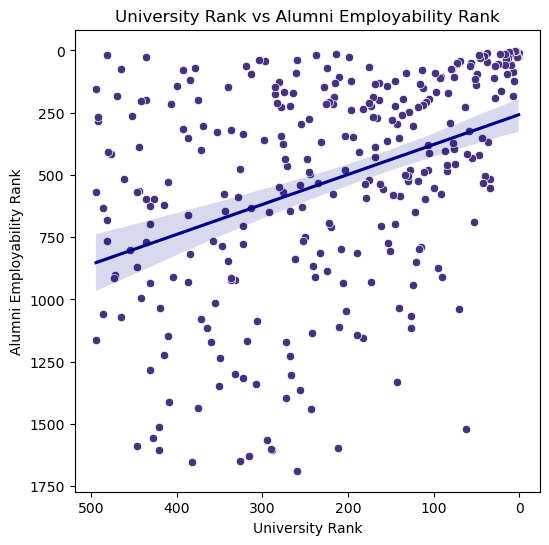

In [7]:
plt.figure(figsize=(6, 6))
scatterplot = sns.scatterplot(x='Rank', y='Alumni Employability Rank', data=df)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='Alumni Employability Rank', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('University Rank vs Alumni Employability Rank')
plt.xlabel('University Rank')
plt.ylabel('Alumni Employability Rank')

plt.show()

Tampak bahwa semakin tinggi peringkat universitas, maka peringkat employability alumni pun juga semakin tinggi. Hal ini masuk akal karena perusahaan akan mencari kandidat yang lulus dari universitas terbaik.

Negara apa yang memiliki rata-rata peringkat employability alumni tertinggi?

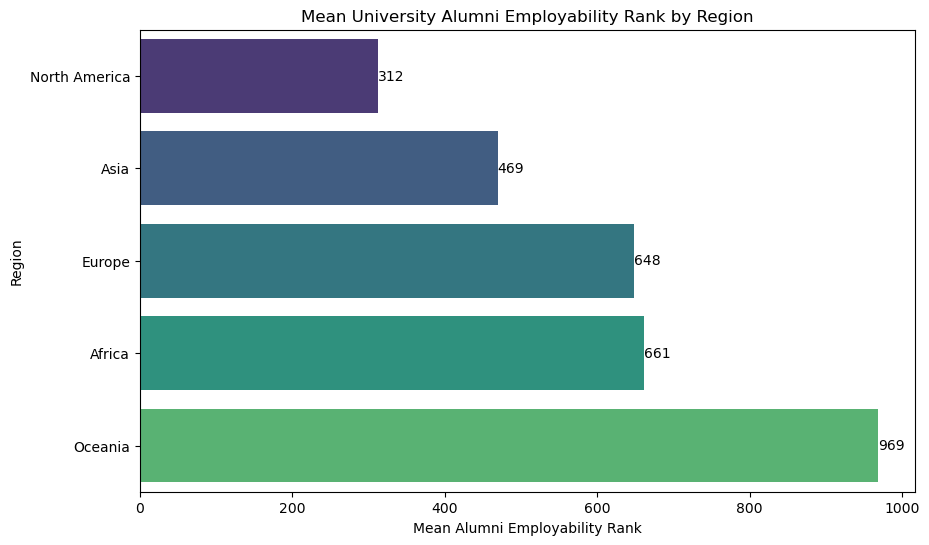

In [40]:
mean_employability_by_region = df.groupby('Region')['Alumni Employability Rank'].mean().sort_values(ascending=True).reset_index()
mean_employability_by_region = mean_employability_by_region[mean_employability_by_region['Region'] != 'Latin America']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Alumni Employability Rank', y='Region', data=mean_employability_by_region)

for index, value in enumerate(mean_employability_by_region['Alumni Employability Rank']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.title('Mean University Alumni Employability Rank by Region')
plt.xlabel('Mean Alumni Employability Rank')
plt.ylabel('Region')

plt.show()

Mahasiswa lulusan Oceania justru memiliki peringkat employability alumni yang paling rendah, sedangkan mahasiswa lulusan Amerika Utara memiliki peringkat employability alumni yang paling tinggi.

Hal ini masuk akal karena Amerika Utara memiliki banyak perusahaan besar yang berbasis di sana sehingga mahasiswa lulusan Amerika Utara memiliki kemudahan dalam mencari kerja.

Apakah universitas yang memiliki peringkat tinggi juga memiliki rating google maps yang lebih tinggi?

C:\Users\Nando\AppData\Local\Temp\ipykernel_28484\3542178305.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=df, x='Rank Bins', y='Rating', ci=None, palette='viridis')


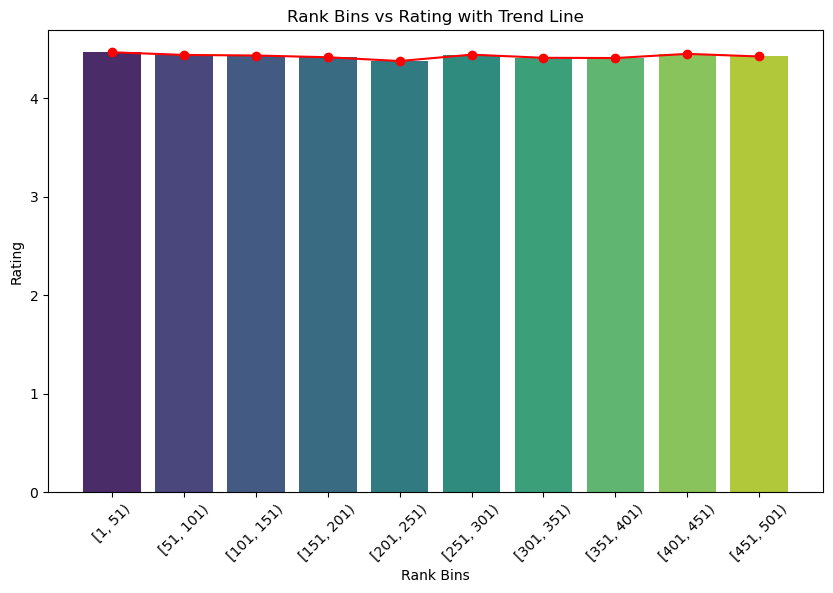

In [22]:
df['Rank Bins'] = pd.cut(df['Rank'], bins=range(1, df['Rank'].max() + 50, 50), right=False)

rank_bins_mean = df.groupby('Rank Bins')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df, x='Rank Bins', y='Rating', ci=None, palette='viridis')

plt.plot(rank_bins_mean['Rank Bins'].astype(str), rank_bins_mean['Rating'], color='red', marker='o')

plt.xticks(rotation=45)

plt.title('Rank Bins vs Rating with Trend Line')
plt.xlabel('Rank Bins')
plt.ylabel('Rating')

plt.show()

Tidak. Distribusi rating universitas di Google Maps sangat merata. Hal tersebut masuk akal karena rating universitas di Google Maps bukan acuan untuk menentukan kualitas pendidikan di universitas tersebut. Rating universitas di Google Maps hanya berdasarkan pengalaman orang-orang yang pernah mengunjungi universitas tersebut.

Bagaimana korelasi antara peringkat universitas dengan jumlah review di google maps?

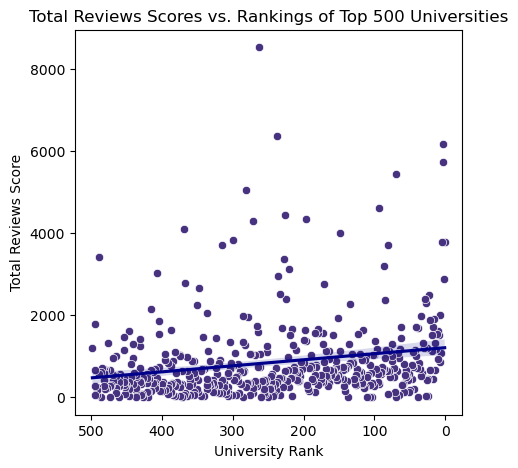

In [11]:
plt.figure(figsize=(5, 5))
scatterplot = sns.scatterplot(x='Rank', y='Total Reviews', data=df)

plt.gca().invert_xaxis()

sns.regplot(x='Rank', y='Total Reviews', data=df, scatter=False, ax=scatterplot.axes, color='darkblue')

plt.title('Total Reviews Scores vs. Rankings of Top 500 Universities')
plt.xlabel('University Rank')
plt.ylabel('Total Reviews Score')

plt.show()

Semakin bagus peringkat universitas, maka jumlah review di Google Maps pun juga semakin banyak.

Hal ini masuk akal karena universitas yang memiliki peringkat lebih bagus biasanya lebih terkenal dan banyak orang yang sudah mengunjungi universitas tersebut.

## **Kesimpulan**
- Sebagian besar universitas terbaik di dunia berada di Eropa
- Semakin tinggi peringkat universitas, maka skor TOEFL dan IETLS mahasiswa yang diterima pun juga semakin tinggi.
- Rata-rata skor TOEFL mahasiswa top 300 universitas terbaik adalah di atas 80 dan skor IETLS nya di atas 6.0
- Semakin tinggi peringkat universitas, maka jumlah mahasiswa asingnya juga semakin banyak.
- Sebagian besar universitas terbaik memiliki 10000 - 30000 mahasiswa
- Universitas terbaik di Asia didominasi oleh perempuan, sedangkan di benua lain didominasi oleh laki-laki.
- Top 100 universitas memiliki skor akreditasi di atas 60, sedangkan top 500 universitas memiliki skor akreditasi di atas 23.
- Amerika Utara memiliki rata-rata skor akreditas tertinggi, sedangkan Afrika yang terendah
- Universitas di Indonesia yang masuk daftar top 500 adalah Universitas Indonesia, Universitas Gadjah Mada, Institut Teknologi Bandung, Universitas - Airlangga, dan Institut Pertanian Bogor.
- Skor TOEFL mahasiswa di Amerika Utara hampir 2 kali lipat lebih tinggi daripada Afrika.
- Mahasiswa asing terbanyak ada di Oceania dan yang paling sedikit ada di Africa
- Semakin tinggi peringkat universitas, maka lulusannya semakin mudah mencari pekerjaan
- Mahasiswa lulusan Amerika Utara memiliki peringkat alumni employability terbaik.
- Terdapat distribusi yang merata antara rating universitas di Google Maps dengan peringkat universitas tersebut.
- Semakin tinggi peringkat universitas, maka rata-rata jumlah review di Google Maps pun juga semakin banyak.